<a href="https://colab.research.google.com/github/ayulockin/Thought-Experiments/blob/master/DirectionCNN_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

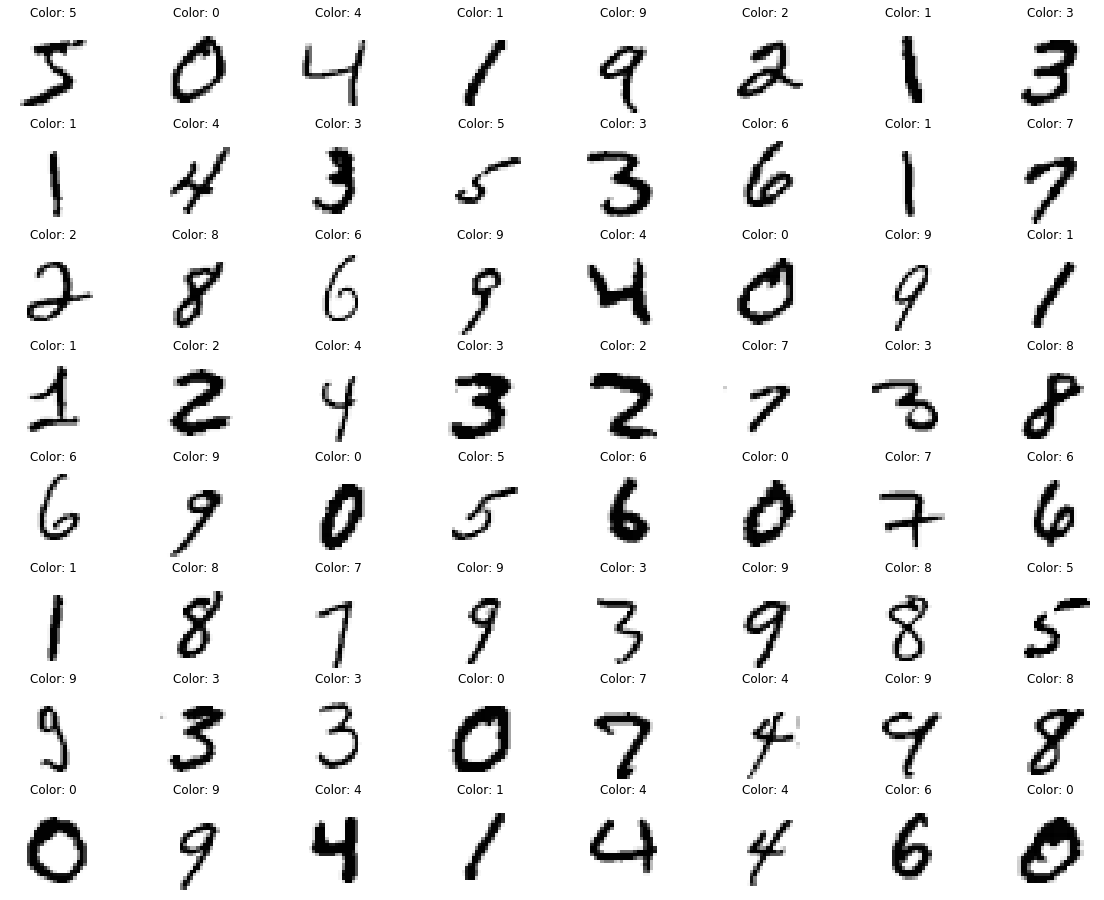

In [49]:
sample_images = x_train[:64]
sample_labels = y_train[:64]
rows = 8
cols = 8

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 16));
c = 0
for i in range(rows):
  for j in range(cols):
    axs[i][j].set_title('Color: {}'.format(sample_labels[c]))
    axs[i][j].imshow(sample_images[c], cmap='Greys');
    axs[i][j].axis('off');
    c+=1

# plt.imshow(x_train[1], cmap='Greys');

In [0]:
import pandas as pd

from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten
import keras.backend as K

In [0]:
x_train = x_train.reshape((x_train.shape+(1,)))
x_test = x_test.reshape((x_test.shape+(1,)))


y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [52]:
print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

X_train:  (60000, 28, 28, 1)
y_train:  (60000, 10)
X_test:  (10000, 28, 28, 1)
y_test:  (10000, 10)


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
aug = ImageDataGenerator(rescale=1/255.0)

In [58]:
def model():
  inputs = Input(shape=(28,28,1))
  
  x = Conv2D(32, (3,3), strides=1, activation='relu', padding='valid')(inputs)
  x = Conv2D(32, (3,3), strides=1, activation='relu', padding='valid')(x)
  x = MaxPooling2D(pool_size=(3,3))(x)
  
  x = Flatten()(x)
  x = Dropout(0.5)(x)
  x = Dense(1024, activation='relu')(x)
  x = Dense(512, activation='relu')(x)
  x = Dense(128, activation='relu')(x) 
  x = Dense(10, activation='softmax')(x)
  
  return Model(inputs=inputs, outputs=x)

K.clear_session()
model = model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1623 - acc: 0.9490 - val_loss: 0.0499 - val_acc: 0.9855
Epoch 2/3
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0757 - acc: 0.9779 - val_loss: 0.0421 - val_acc: 0.9873
Epoch 3/3
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0572 - acc: 0.9833 - val_loss: 0.0413 - val_acc: 0.9885


In [0]:
model.save('mnist.h5')

## Seeing how the model is predicting given input with different angles. 

In [0]:
import numpy as np

In [69]:
sample_indexes = np.random.choice(len(x_test), 64)
sample_indexes

array([2504,  373, 9838, 9593, 5362, 9426, 6161, 2737, 1317, 5631,  603,
       5430, 1809, 3354, 2399, 8626, 6462, 8737, 9716, 7756, 7032, 7782,
       8199, 4485, 3313, 8084, 7292, 5023, 8231, 8041, 4863, 9968, 7754,
       4420, 6129, 5242, 5968, 6404, 5174, 6592, 5416, 2298, 9373, 9143,
       8996, 5522, 7408, 7046, 1040, 2455, 3770, 1191, 2527, 4861, 3252,
       9348, 2061, 4476, 7919, 1228,  547, 9869, 7753, 7815])

##### Normal prediction

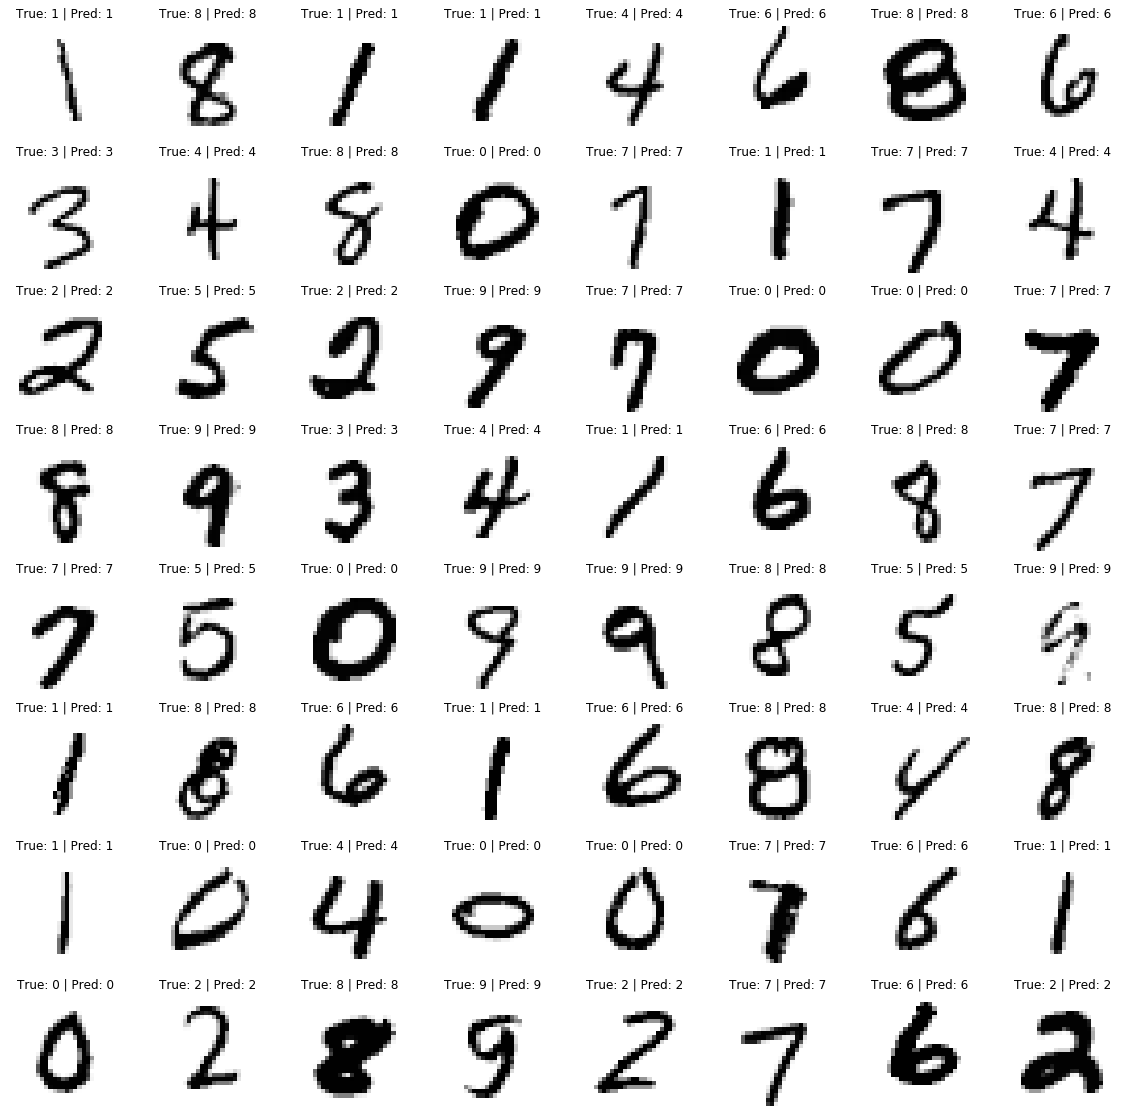

In [88]:
rows = 8
cols = 8

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20));
c = 0
for i in range(rows):
  for j in range(cols):
    img_pred = x_test[sample_indexes[c]].reshape((1,)+x_test[sample_indexes[c]].shape)
    img_plot = x_test[sample_indexes[c]].reshape((x_test[sample_indexes[c]].shape[:-1]))

    pred = np.argmax(model.predict(img_pred))
    
    axs[i][j].set_title('True: {} | Pred: {}'.format(np.argmax(y_test.values[sample_indexes[c]]), pred))
    axs[i][j].imshow(img_plot, cmap='Greys');
    axs[i][j].axis('off');
    c+=1

##### What if the images are upside down and fed to the model?

(1, 28, 28, 1)
9
4


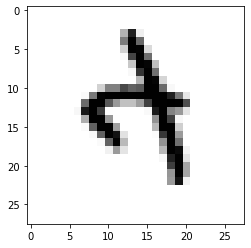

In [115]:
c = 4
img_plot = x_test[sample_indexes[c]].reshape((x_test[sample_indexes[c]].shape[:-1]))

img_plot_updown = np.flipud(x_test[sample_indexes[c]].reshape((x_test[sample_indexes[c]].shape[:-1])))

img_pred = img_plot_updown.reshape(((1,)+img_plot_updown.shape+(1,)))
print(img_pred.shape)
plt.imshow(img_plot_updown, cmap='Greys')

pred = np.argmax(model.predict(img_pred))
print(pred)

print(np.argmax(y_test.values[sample_indexes[c]]))

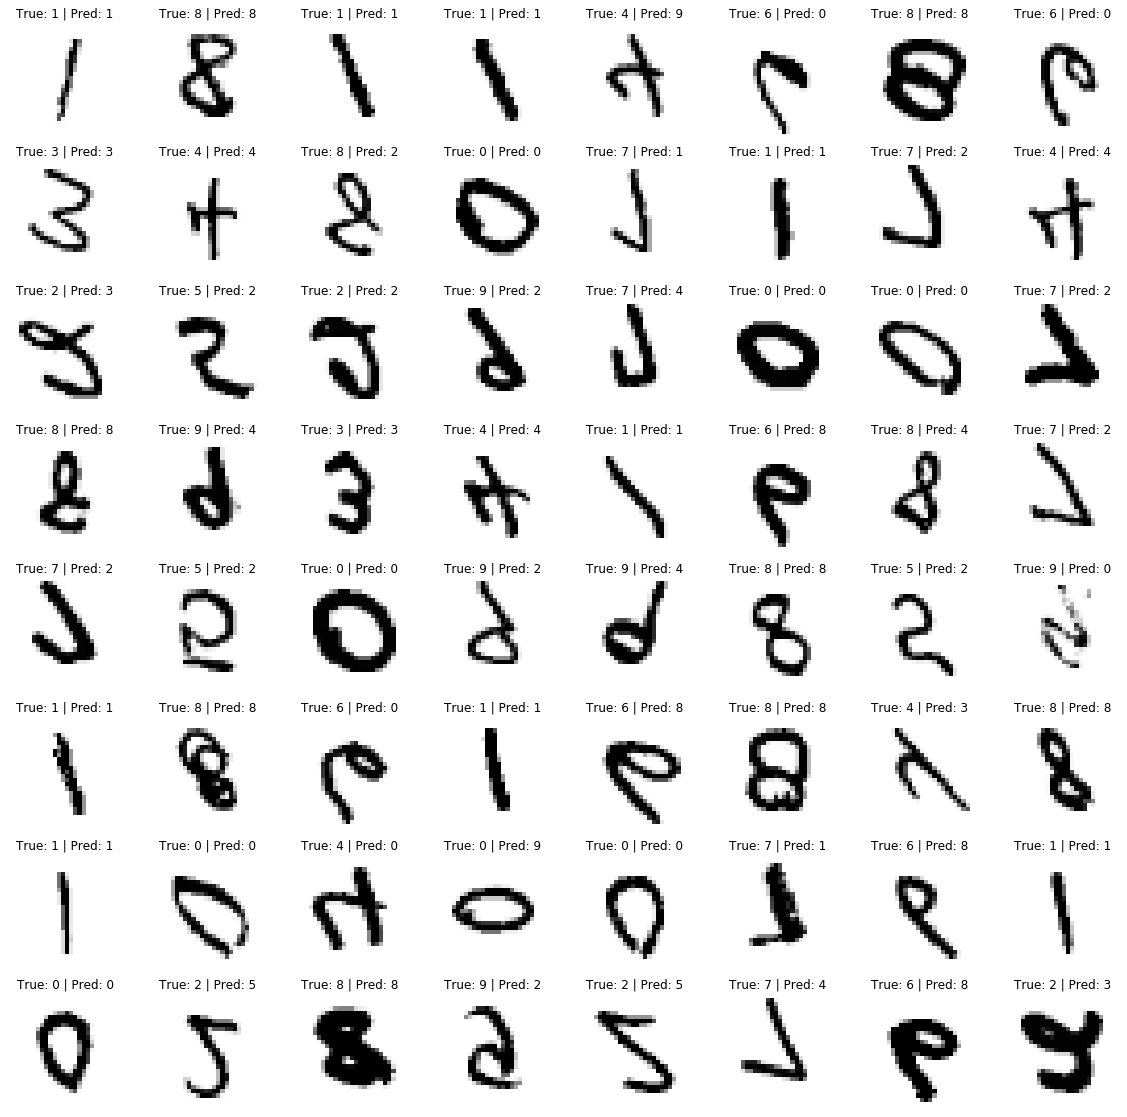

In [114]:
rows = 8
cols = 8

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20));
c = 0
for i in range(rows):
  for j in range(cols):
    img_plot_updown = np.flipud(x_test[sample_indexes[c]].reshape((x_test[sample_indexes[c]].shape[:-1])))
    img_pred = img_plot_updown.reshape(((1,)+img_plot_updown.shape+(1,)))

    pred = np.argmax(model.predict(img_pred))
    
    axs[i][j].set_title('True: {} | Pred: {}'.format(np.argmax(y_test.values[sample_indexes[c]]), pred))
    axs[i][j].imshow(img_plot_updown, cmap='Greys');
    axs[i][j].axis('off');
    c+=1